In [14]:
import math
import time
import random as r
from collections import namedtuple

Point = namedtuple('Point', 'x y')

In [25]:
# 从文件中读取城市点
with open('d:/city.csv', 'rt') as fin:
    import csv
    cin = csv.reader(fin)
    cities = [Point(int(p[0]), int(p[1])) for p in cin]

# 选择前30个点
cities = cities[:100]
citynum = len(cities)

In [26]:
# 给文件添加 num 个点
def append_point(num):
    # 随机生成城市点(x, y),取值范围 0 <= x,y < 100
    def city_point(city_num):
        '''
        city_num 生成器生成点个数
        '''
        from random import randrange
        while city_num > 0:
            yield Point(randrange(0,100), randrange(0,100))
            city_num -= 1
    
    with open('d:/city.csv', 'at', newline='') as fout:
        import csv
        writer = csv.writer(fout)
        for i in city_point(num):
            writer.writerow(i)

        

# 计算两个点之间的距离
def dis(a, b, cache={}):
    if (a ,b) not in cache:
        cache[(a, b)] = math.sqrt((a.x - b.x) ** 2 + (a.y-b.y) ** 2)
    return cache[(a, b)]


# 计算经过每个点的hamilton回路的长度
def pathlen(path):
    length = 0
    nums = len(path)
    for i in range(nums):
        length += dis(path[i], path[(i+1) % nums])
    return length

In [27]:

# 模拟退火算法

# 平衡参数
L = int(citynum * (citynum - 1)/2)


# 初始温度
T0 = 2000

# 初始点x
X0 = cities

# 计算函数
f = pathlen

# 温度
t = T0

# 点
x = X0

# 波尔兹曼常数
K = 1.3806488

# 解 x 的一个邻域
def N(x):
    """
    只交换一个点效果太差( x[a], x[b] = x[b], x[a] )
    """ 
    x = x.copy()
    a = r.randrange(citynum)
    b = r.randrange(citynum) 

    if a > b: a,b = b,a
        
    while a < b:
        x[a], x[b] = x[b], x[a]
        a+=1
        b-=1
    return x


# 冷却机制
def g(t):
    return 0.93 * t
#     return t/math.log(k+1)


# 历史最优解
ps = []

time1  = time.time()
# 迭代寻找优秀解
for i in range(1,L*4):
    newx = N(x)
    detaf = f(newx) - f(x)
    if detaf < 0:
        x = newx
        best = newx
        ps.append((i, f(x)))
    else:
        p = math.exp(-detaf / (K*t))
        if(r.random() < p):
            x = newx
        else:
            x = x
    t = g(t)

print(f(x))
print('用时：', time.time() - time1)

941.0802572056795
用时： 1.9958021640777588


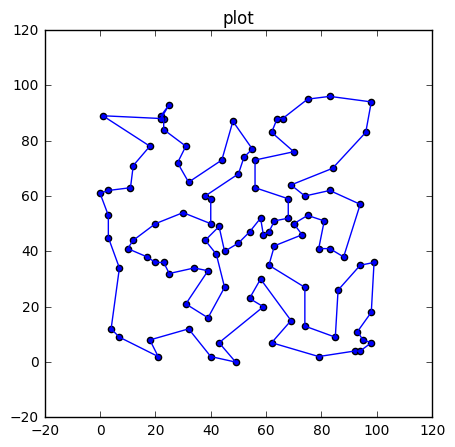

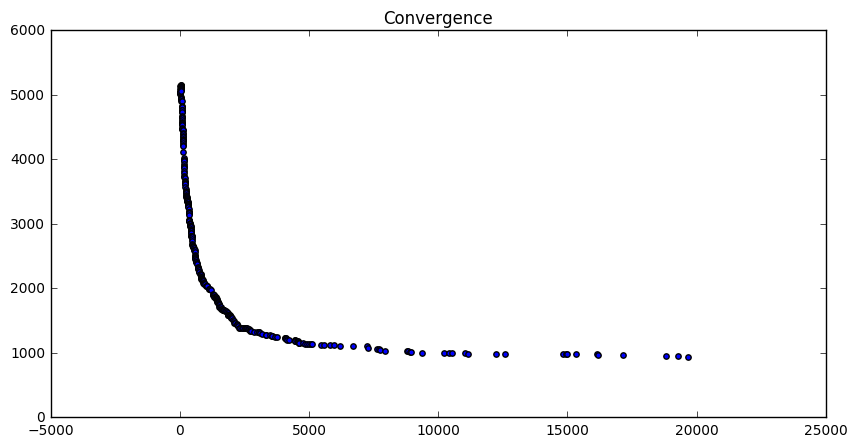

In [28]:
# 将路径画出
def draw_path(best):
    import matplotlib.pyplot as plt
    x = [p.x for p in best]
    x.append(best[0].x)
    y = [p.y for p in best]
    y.append(best[0].y)

    plt.figure(figsize=(5,5))
    plt.plot(x,y)
    plt.scatter(x, y)
    plt.title("plot")
    plt.show()

# 画点
def draw_point(points):
    import matplotlib.pyplot as plt
    x = [p[0] for p in points]
    y = [p[1] for p in points]

    plt.figure(figsize=(10,5))
    
    plt.scatter(x, y, s=15)
    plt.title("Convergence")
    plt.show()
    
draw_path(best)
draw_point(ps)